In [71]:
client = get_client()
order_book = client.futures_order_book(symbol='BTCBUSD')
bids = pd.DataFrame(order_book['bids'], columns=['bids', 'quantity'])
asks = pd.DataFrame(order_book['asks'], columns=['asks', 'quantity'])
order_book = pd.concat([bids, asks], axis=1)
show(order_book)

2023-03-10 00:00:00
2023-03-10 08:19:00
2023-03-10 16:38:00
2023-03-11 00:57:00
2023-03-11 09:16:00
2023-03-11 17:35:00
2023-03-12 01:54:00
2023-03-12 10:13:00
2023-03-12 18:32:00
2023-03-13 02:51:00
2023-03-13 11:10:00
2023-03-13 19:29:00
2023-03-14 03:48:00
2023-03-14 12:07:00
2023-03-14 20:26:00
2023-03-15 04:45:00
2023-03-15 13:04:00
2023-03-15 21:23:00
2023-03-16 05:42:00
2023-03-16 14:01:00
2023-03-16 22:20:00
2023-03-17 06:39:00
2023-03-17 14:58:00
2023-03-17 23:17:00
2023-03-18 07:36:00
2023-03-18 15:55:00
2023-03-19 00:14:00
2023-03-19 08:33:00
2023-03-19 16:52:00
2023-03-20 01:11:00
2023-03-20 09:30:00
2023-03-20 17:49:00
2023-03-21 02:08:00
2023-03-21 10:27:00
2023-03-21 18:46:00
2023-03-22 03:05:00
2023-03-22 11:24:00
2023-03-22 19:43:00
2023-03-23 04:02:00
2023-03-23 12:21:00
2023-03-23 13:41:00


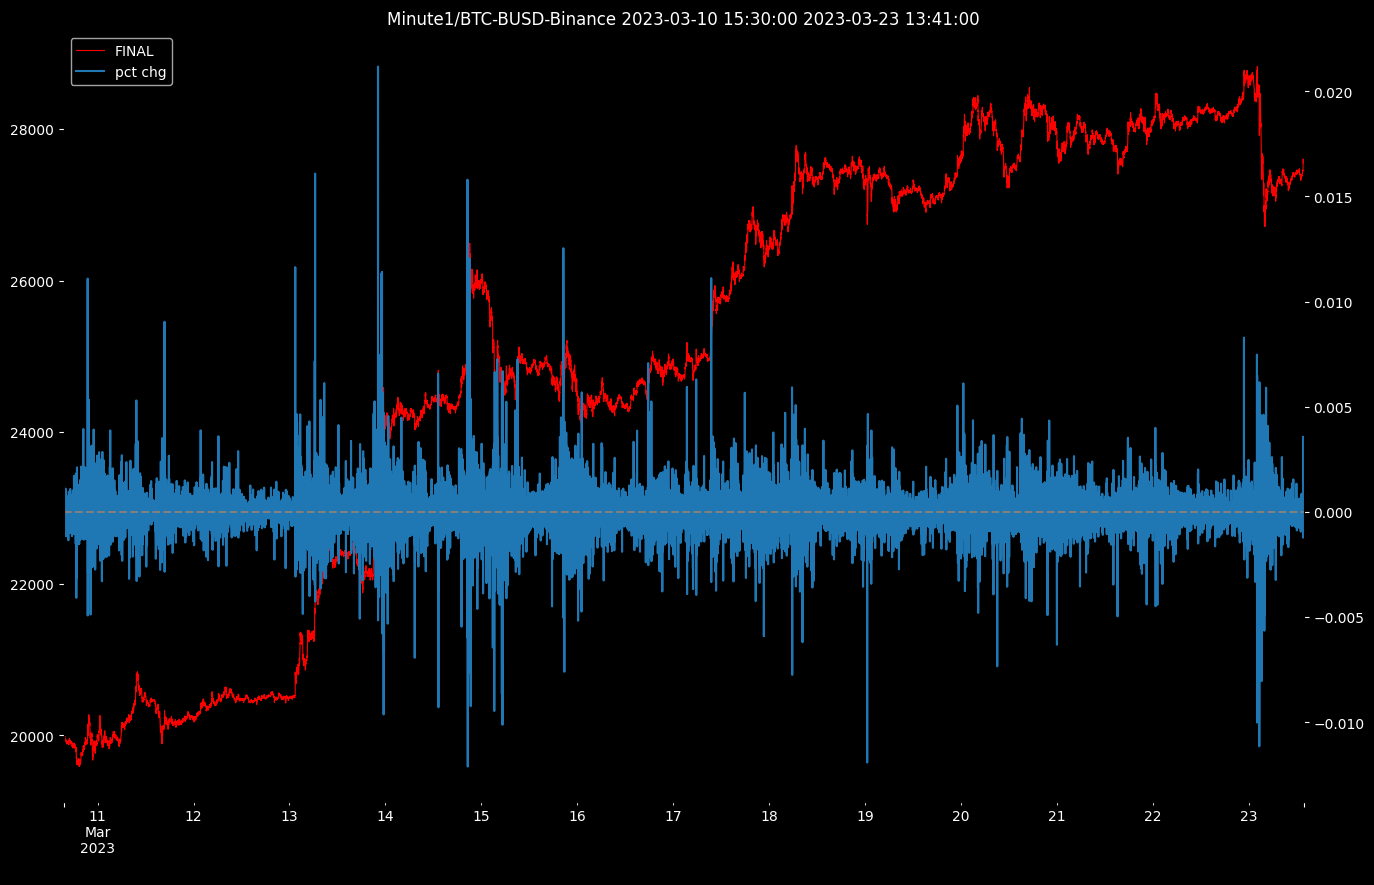

In [21]:
from syscore.fileutils import  resolve_path_and_filename_for_package
from paper.sysinit.scrape_okx_history_prices import update as observe_market
from paper.topic.common_import import *

instrument_code = 'BTC-BUSD-Binance'
Fre = 'Minute1'
observe_market(instrument_code, '1m', since = '2023-03-10T00:00+08')
price = pd.read_csv(resolve_path_and_filename_for_package('{}.{}_{}.csv'.format('paper.sysinit.data.{}'.format('Binance'), Fre, instrument_code)), index_col=0, parse_dates=True)['FINAL']
price = select_period(price, ('2023-03-10T15:30', pd.Timestamp.now()))
ax1 = price.plot(figsize=(16, 10), title='{}/{} {} {}'.format( Fre, instrument_code, price.index[0], price.index[-1]), color='r', lw=0.8)
show(pd.DataFrame({'holdl return': ['{:.1%}'.format(price[-1] / price[0] - 1)], 'min max chg': ['{:.1%}'.format(price.max() / price[0].min() - 1)]}), caption=instrument_code)


feature1 = price.pct_change().rename('pct chg')
ax2 = feature1.plot(secondary_y=True)
_ = ax2.hlines(0, price.index[0], price.index[-1], colors='gray', linestyles='dashed')

lines = ax1.get_lines() + ax2.get_lines()
ax2.legend(lines, [line.get_label() for line in lines], loc='upper left')
plt.show()

show(feature1.describe())

# _ = sns.histplot(feature1, log_scale=(False, True), binwidth=0.004)
# plt.show()


In [ ]:
# vol = vol.rename('vol')
# position = position.rename('position')
# price.tail(24 * 10).plot(figsize=(15, 6), legend=True)
# (price*position).tail(24 * 10).plot(secondary_y=True, legend=True)
# plt.axhline(y=0, linewidth=2, color='r')
# plt.axhline(y=2000, linewidth=2, color='r')

# from syscore.pandas.frequency import resample_prices_to_business_day_index
# show(price)
# show(resample_prices_to_business_day_index(price).diff())
# account.curve().plot()
# plt.title('Profit and Loss')
# plt.ylabel('PnL')
# plt.xlabel('Time')